# An Aside on Alpha Stable Distributions


Alpha-stable distributions are a fascinating family of distributions, in the sense that basic "practices of statistics" like hypothesis testing wouldn't exist if there were no $\alpha$-stable distributions (we'll see why as we continue). This notebook will serve as an extremely brief introduction and "learning by doing" exercise. The goal is to get a little familiarity with the distributions by "laying hands on them" and learning from some examples. 

Whenever possible I will draw discussion from external (open) sources, and focus energy and time on code. 

Let's start with a quick description [from wikipedia](https://en.wikipedia.org/wiki/Stable_distribution): 

> In probability theory, a distribution or a random variable is said to be stable if a linear combination of two independent copies of a random sample has the same distribution, up to location and scale parameters. The stable distribution family is also sometimes referred to as the Lévy alpha-stable distribution, after Paul Lévy, the first mathematician to have studied it.

More description from U Huntsville's great [*Random* online notes](http://www.math.uah.edu/stat/), specifically the [stable distribution section](http://www.math.uah.edu/stat/special/Stable.html):

> Stable distributions are an important general class of probability distributions on $\mathbb{R}$ that are defined in terms of location-scale transformations. Stable distributions occur as limits (in distribution) of scaled and centered sums of independent, identically distributed variables. Such limits generalize the central limit theorem, and so stable distributions generalize the normal distribution in a sense. The pioneering work on stable distributions was done by Paul Lévy.

> ...

> Recall that two distributions on $\mathbb{R}$ that are related by a location-scale transformation are said to be of the same type, and that being of the same type defines an equivalence relation on the class of distributions on $\mathbb{R}$. With this terminology, the definition of stability has a more elegant expression: X has a stable distribution if the sum of a finite number of independent copies of X is of the same type as X.

This family of distributions is defined by four parameters, which have a variety of different names depending on the text you reference. I'll use the following to be consistent with Dominicy and Veredas:

- $\alpha \in (0,2]$, is the "tail index:" it measures the thickness of tails of the distribution. 
    - Also called the "characteristic index," "stability index," or the first shape parameter.
    - Governs existence of moments: $\mathbb{E} \left[ X^{p} \right] \lt \infty \textrm{, } \forall p \lt \alpha$. 
    - Note this implies moments greater than 2 don't exist. (In fact it turns out that only the Normal distribution, a special case of the stable family, will have finite variance. Very interesting.) 
- $\beta \in [-1,1]$ is the "skewness" parameter. 
    - $\beta < 0 \rightarrow $ left-skewed (left-asymmetric), while $\beta > 0 \rightarrow $ right-skewed (right-asymmetric).   
    - Also referred to as the second shape parameter.
    - Note: as $\alpha \rightarrow 2, \beta$ become unidentifies; for $\alpha = 2$ the distribution is Normal and $\beta$ is ignored. 
- $\sigma \in \mathbb{R}^{+}$ is the "scale" or "dispersion" parameter
- $\mu \in \mathbb{R}$ is the location parameter


An instance of this family may be denoted $S(\alpha, \beta, \sigma, \mu)$. Be careful about the last two $\sigma$ and $\mu$ parameters -- these do not correspond immediately to typical mean and variance. For example, for normal distribution special case, $2 \sigma^{2}_{stable} = \sigma^{2}_{normal}$ when parameterizing the alpha-stable distribution for the normal case.

There are three special cases of the family of stable distributions:

- Normal: $S(\alpha=2, \beta=NA, \frac{\sigma}{\sqrt{2}}, \mu) \rightarrow \mathscr{N}(\mu, \sigma^2)$
- Cauchy: $S(\alpha=1, \beta=0, \sigma, \mu)$
- Levy: $S(\alpha=0.5, \beta=1, \sigma, \mu)$



Directly quoting Domicy and Veredas again: 

> "A related property of the $\alpha$-stable distribution is that it is a domain of attraction – this is often known as the Generalized Central Limit Theorem – which states that the only distribution that arises as limit from sums of i.i.d. random variables (suitably scaled and centered) is the $\alpha$-stable distribution."

Combine this with the observation that the Normal distribution is the only stable distribution with finite variance. May it be that many distributions we care about have no second moment? (This should be of particular interest to anyone wishing to use ABMs, which typically have convolutions of multiple distributions.)
 
## Let's Play with Simulated Data

Fortunately SciPy has a (somewhat limited) levy-stable distribution in the stats library. Let's test out the special cases of levy-stable. 

In [49]:
from __future__ import print_function, division
import scipy.stats as stats
import pylab as plt
import numpy as np

mean: 0.00461013722861
stdev: 0.992471025951


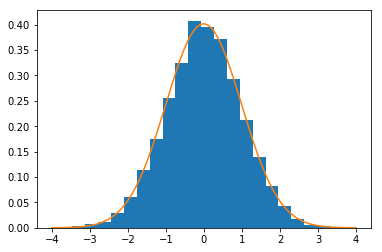

In [50]:
# Let's draw some rvs from the levy-stable distribution:
# Form: rvs(alpha, beta, loc=0, scale=1, size=1, random_state=None)
n = 10000
mu=0.0
sigma=1.0
gaussian_special_case_rvs = stats.levy_stable.rvs(alpha=2, beta=1, loc=mu, scale=sigma/np.sqrt(2), size=n)

gaussian_mean = np.mean(gaussian_special_case_rvs)
gaussian_std = np.std(gaussian_special_case_rvs)
print("mean:", gaussian_mean)
print("stdev:", gaussian_std)

x_range = np.linspace(-4,4,1000)    #random.normal.rvs(loc=test_mean, scale=test_std)

plt.hist(gaussian_special_case_rvs, bins=21, normed=True)
plt.plot(x_range, stats.norm.pdf(x_range, loc=test_mean, scale=test_std) )
plt.show()

mean: 0.396060735427
fraction vals < trimval=10:  0.9686


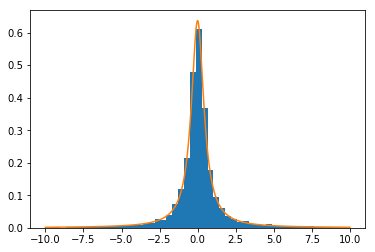

In [51]:
# Let's look at a cauchy:
cauchy_special_case_rvs = stats.levy_stable.rvs(alpha=1, beta=0, loc=mu, scale=sigma/2.0, size=n)

cauchy_mean = np.mean(cauchy_special_case_rvs)
#cauchy_std = np.std(cauchy_special_case_rvs)
print("mean:", cauchy_mean)
#print("stdev:", cauchy_std)

#x_range = np.linspace(-4,4,1000)    #random.normal.rvs(loc=test_mean, scale=test_std)

# Let's trim to look at in hist:
trimval = 10
trimndx =  abs(cauchy_special_case_rvs) < trimval
print("fraction vals < trimval="+str(trimval)+ ": ",  sum(trimndx)/len(trimndx) )
plot_rvs = cauchy_special_case_rvs[trimndx]

x_range = np.linspace(-trimval,trimval,1000)

plt.hist(plot_rvs, bins=51, normed=True)
plt.plot(x_range, stats.cauchy.pdf(x_range, loc=mu, scale=sigma/2.0) )
plt.show()

mean: 20464.1259037
fraction vals < trimval=10:  0.8261


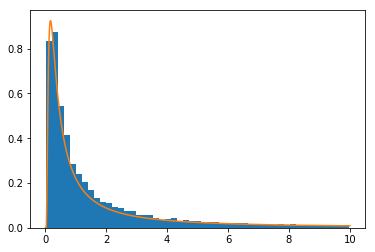

In [52]:
# Let's look at a Levy:
levy_special_case_rvs = stats.levy_stable.rvs(alpha=0.5, beta=1.0, loc=mu, scale=sigma/2.0, size=n)

levy_mean = np.mean(levy_special_case_rvs)
print("mean:", levy_mean)

# Let's trim to look at in hist:
trimval = 10
trimndx =  abs(levy_special_case_rvs) < trimval
print("fraction vals < trimval="+str(trimval)+ ": ",  sum(trimndx)/len(trimndx) )
plot_rvs = levy_special_case_rvs[trimndx]

x_range = np.linspace(0.0,trimval,1000)

plt.hist(plot_rvs, bins=51, normed=True)
plt.plot(x_range, stats.levy.pdf(x_range, loc=mu, scale=sigma/2.0) )
plt.show()

Excellent. Not shown: small perturbations of the $\alpha, \beta$ parameters show how the distributions "move away" from the special cases as the paramaterization moves away. 

Next steps: generate the data needed for the MSQ estimation experiments. 


## Notes:

- [ ] Need to determine how to standardize sample when don't know norming parameters. 
    - specifically, need to querry about how to standardize.
    - [x] NOTE: ASSUME that this is "standard" standardization. See if this replicates.
- [ ] code two versions of the THETA function, and one THETAR function
- [ ] generate a sample, normalize it, and run it through the THETAr funtion
- [ ] then let's try this thing. 

# Additional Reading

To explore further: 

- Mandelbrot and Taylor (1967), [On the Distribution of Stock Price Differences](http://pubsonline.informs.org/doi/abs/10.1287/opre.15.6.1057)
- In R: https://cran.r-project.org/package=stabledist
- The PyLevy package, with interesting information:
    - http://www.logarithmic.net/pfh/pylevy
    - https://github.com/josemiotto/pylevy
- Notes from *Random* (formerly Virtual Laboratories in Probability and Statistics) at U. Huntsville on [stable distributions](http://www.math.uah.edu/stat/special/Stable.html)
    - [special case: Levy](http://www.math.uah.edu/stat/special/Levy.html)
    - [special case: Normal](http://www.math.uah.edu/stat/special/Normal.html)
    - [special case: Cauchy](http://www.math.uah.edu/stat/special/Cauchy.html)
    - See also their [home site](www.math.uah.edu/stat/) for more information on this great open resource. 
- [Recognition of stable distribution with Levy index alpha close to 2](https://arxiv.org/abs/1205.6458)
- [Thayer Watkin's notes](http://www.sjsu.edu/faculty/watkins/mandel.htm)
    - although note that 'peakedness' is probably [not quite](http://mathworld.wolfram.com/Kurtosis.html) the [correct term](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4321753/) for the first shape parameter
    - note that Watkin's more extensive notes on many topics are interesting quick overviews.
- Wolfram MathWorld [page on stable distributions](http://mathworld.wolfram.com/StableDistribution.html)
- Mark Veillette's page on [alpha-stable distributions](http://math.bu.edu/people/mveillet/html/alphastablepub.html)
- [Mathworks discussion](https://www.mathworks.com/help/stats/stable-distribution.html) of $\alpha$-stable distributions
- NIST handbook of stats: [skewness and kurtosis](http://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm)